In [1]:
import numpy as np
import skimage.feature
from skimage.color import rgb2gray
from skimage.io import imread, imsave, imshow
import math
import glob
from PIL import Image
import pandas as pd
import csv

In [2]:
def class_definition(imgpath):
    if "paper" in imgpath:
        return 'paper'
    elif "rock" in imgpath:
        return 'rock'
    elif "scissors" in imgpath:
        return 'scissors'

In [3]:
def extract_feature(img):
    img_string = Image.open(img)
    img_filename = img_string.filename
    img_class = class_definition(img_filename)
#     print(img_filename)
#     print(img_class)
    
    im = skimage.io.imread(img, as_gray=True)    
    im = skimage.img_as_ubyte(im)
    im = np.true_divide(im, 32)
    im = im.astype(np.uint8)
    g = skimage.feature.greycomatrix(im, [1], [0], levels=8, symmetric=True, normed=True)
    feature = np.array([
        img_filename,
        img_class,
        skimage.feature.greycoprops(g, 'contrast')[0][0],
        skimage.feature.greycoprops(g, 'correlation')[0][0],
        skimage.feature.greycoprops(g, 'energy')[0][0],
        skimage.feature.greycoprops(g, 'homogeneity')[0][0]
    ])
    
    return feature
    

In [4]:
def training(datasets):
    feature_datasets =[]
    for data in datasets:
        data_feature = extract_feature(data)
        feature_datasets.append(data_feature)
    print(feature_datasets)
    # opening the csv file in 'w+' mode 
    file = open('training.csv', 'w+', newline ='') 
    # writing the data into the file 
    with file:     
        write = csv.writer(file) 
        write.writerows(feature_datasets) 

In [5]:
datasets = glob.glob('rps-cv-images/train/*/*.png')
classifier = training(datasets)

[array(['rps-cv-images/train\\paper\\04l5I8TqdzF9WDMJ.png', 'paper',
       '0.06518394648829431', '0.9394894673808404', '0.6432941263742384',
       '0.9675284280936456'], dtype='<U46'), array(['rps-cv-images/train\\paper\\14K62H4KG1hg5qiJ.png', 'paper',
       '0.07622073578595318', '0.9506366374298766', '0.5535771696629159',
       '0.9620702341137124'], dtype='<U46'), array(['rps-cv-images/train\\paper\\27XFtQjjXQ8AP8Tl.png', 'paper',
       '0.04974916387959867', '0.953439726297583', '0.649202561507017',
       '0.9751254180602008'], dtype='<U46'), array(['rps-cv-images/train\\paper\\37PRV3B9HxuUPkQr.png', 'paper',
       '0.04112040133779264', '0.9715445096931039', '0.5708962921314097',
       '0.9794598662207357'], dtype='<U46'), array(['rps-cv-images/train\\paper\\389udM70tLrMVL5H.png', 'paper',
       '0.06188963210702341', '0.9297022132511559', '0.6305284596131415',
       '0.9690551839464884'], dtype='<U46'), array(['rps-cv-images/train\\paper\\3YvRoN0ZGuXVWEbh.png', 'paper'

In [6]:
def euclidian_distance(img, data_training):
    datas_distance = []
    predict_image = extract_feature(img)
    with open(data_training) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            img_filename = row[0]
            img_class = row[1]
            contrast_x = (float(row[2]) - float(predict_image[2])) ** 2
            correlation_x = (float(row[3]) - float(predict_image[3])) ** 2
            energy_x = (float(row[4]) - float(predict_image[4])) ** 2
            homogenity_x = (float(row[5]) - float(predict_image[5])) ** 2
            distance = contrast_x + correlation_x + energy_x + homogenity_x
            distance = math.sqrt(distance)
            
            a_data_distance = np.array([
                img_filename,
                img_class,
                distance
            ])
            
            datas_distance.append(a_data_distance)
            
    # opening the csv file in 'w+' mode 
    file = open('knn-test.csv', 'w+', newline ='') 
    # writing the data into the file 
    with file:     
        write = csv.writer(file) 
        write.writerows(datas_distance) 

In [7]:
def classification(k,euclidian_distance):
    min_array = []
    with open(euclidian_distance) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        sortedlist = sorted(readCSV, key=lambda row: row[2])
    
    data_count = 0
    while (data_count < k):
        min_array.append(sortedlist[data_count])
        data_count = data_count + 1
        
    paper = 0
    rock = 0
    scissors = 0
    for data in min_array:
        if data[1] == 'paper':
            paper = paper + 1
        elif data[1] == 'rock':
            rock = rock + 1
        elif data[1] == 'scissors':
            scissors = scissors + 1
            
    print(paper,rock,scissors)
    print(*min_array, sep="\n")
    
    if (max(paper,rock,scissors) == paper):
        return 'Hand: Paper'
    elif (max(paper,rock,scissors) == rock):
        return 'Hand: Rock'
    elif (max(paper,rock,scissors) == scissors):
        return 'Hand: Scissors'

0 5 0
['rps-cv-images/train\\rock\\nmxmRD1050oGpGEa.png', 'rock', '0.004640568895770997']
['rps-cv-images/train\\rock\\bsj2s38rcZvedHSI.png', 'rock', '0.005343781535881635']
['rps-cv-images/train\\rock\\lXb5SpRU737FgSN8.png', 'rock', '0.0057307430216358']
['rps-cv-images/train\\rock\\eGm3dLnWBxRrjlJX.png', 'rock', '0.006339767227374355']
['rps-cv-images/train\\rock\\7NqXwATGidLt6kZY.png', 'rock', '0.007281847371995886']
rps-cv-images/validation/rock/00nKV8oHuTGi20gq.png  ->  Hand: Rock


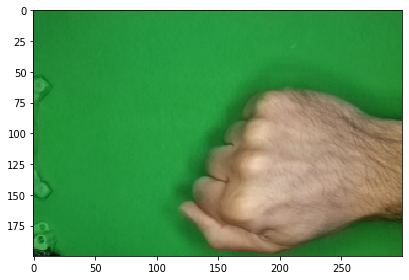

In [8]:
# Test Single
data_training = 'training.csv'
test_image = 'rps-cv-images/validation/rock/00nKV8oHuTGi20gq.png'
ed_result = euclidian_distance(test_image, data_training)
data_ed = 'knn-test.csv'
k = 5
class_result = classification(k, data_ed)
imshow(test_image)
print(test_image,' -> ',class_result)

In [9]:
# Multiple Test
data_test = glob.glob('rps-cv-images/validation/*/*.png')
data_training = 'training.csv'
data_ed = 'knn-test.csv'
k = 1
test_summary = []

for data in data_test:
    # Test Single    
    test_image = data
    ed_result = euclidian_distance(test_image, data_training)    
    class_result = classification(k, data_ed)
    test = np.array([
        test_image,
        class_result
    ])
    test_summary.append(test)

# opening the csv file in 'w+' mode 
file = open('multi_test_summary.csv', 'w+', newline ='') 
# writing the data into the file 
with file:     
    write = csv.writer(file) 
    write.writerows(test_summary)

1 0 0
['rps-cv-images/train\\paper\\Gv71lr2m5b9rBwPy.png', 'paper', '0.0027729111181428023']
0 0 1
['rps-cv-images/train\\scissors\\Rk0jnjn8GxT17vIT.png', 'scissors', '0.003046669695244178']
0 1 0
['rps-cv-images/train\\rock\\BYoDUgGsCMmAIF9I.png', 'rock', '0.002224675729933285']
1 0 0
['rps-cv-images/train\\paper\\bddldJIGmQP5CSLD.png', 'paper', '0.003921977395645664']
0 1 0
['rps-cv-images/train\\rock\\9j89H6omx9ieI8sf.png', 'rock', '0.00209225706144203']
1 0 0
['rps-cv-images/train\\paper\\v6wOWeRyh3Sv5BXo.png', 'paper', '0.025251067785363283']
1 0 0
['rps-cv-images/train\\paper\\DOuDihjhzIuZ2skd.png', 'paper', '0.0044375353649293015']
1 0 0
['rps-cv-images/train\\paper\\HuunhhoTMXTrST2Z.png', 'paper', '0.004315070322493268']
1 0 0
['rps-cv-images/train\\paper\\crYtjQcVKQjCAWYq.png', 'paper', '0.001981420265827166']
0 1 0
['rps-cv-images/train\\rock\\qNLvry2jUcwSulgu.png', 'rock', '0.0024288611073602245']
1 0 0
['rps-cv-images/train\\paper\\Ih5Z5Z3xFZ17IcZS.png', 'paper', '0.0123707

0 0 1
['rps-cv-images/train\\scissors\\e8p8cRK4gABNoiaZ.png', 'scissors', '0.0024340320487321963']
0 0 1
['rps-cv-images/train\\scissors\\Z2jcrWNs2feSmVtI.png', 'scissors', '0.0015592612244163407']
0 0 1
['rps-cv-images/train\\scissors\\itSX8Pe5BwSSbcEb.png', 'scissors', '0.005318608081298248']
1 0 0
['rps-cv-images/train\\paper\\LI47bUY9rR60z73q.png', 'paper', '0.004198976788918934']
0 0 1
['rps-cv-images/train\\scissors\\CO4Xhg1dx5dmvwlo.png', 'scissors', '0.002141171072494621']
0 1 0
['rps-cv-images/train\\rock\\NlFsco3hpee3X0wS.png', 'rock', '0.0018602633535459837']
0 0 1
['rps-cv-images/train\\scissors\\CjjM6i1OEFaKcm6e.png', 'scissors', '0.0028444828001047084']
0 0 1
['rps-cv-images/train\\scissors\\K06meJWsLavqjfyX.png', 'scissors', '0.004486134911060897']
0 0 1
['rps-cv-images/train\\scissors\\rgh4Zpx9TkORJIWe.png', 'scissors', '0.004438917904489485']
0 0 1
['rps-cv-images/train\\scissors\\nukdu4gV8vol1FY9.png', 'scissors', '0.0035138427239120107']
0 0 1
['rps-cv-images/train\\

In [10]:
# Accuracy
test_result = 'multi_test_summary.csv'
with open(test_result) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    line = len(list(readCSV))
accuracy = 0

with open(test_result) as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        print(row)
        if 'paper' in row[0]:
            if 'Paper' in row[1]:
                accuracy = accuracy + 1
        elif 'rock' in row[0]:
            if 'Rock' in row[1]:
                accuracy = accuracy + 1
        elif 'scissors' in row[0]:
            if 'Scissors' in row[1]:
                accuracy = accuracy + 1

accuracy = (accuracy/line)*100
print('\nModel Accuracy :',accuracy,'%')
print('Data Count :',line)

['rps-cv-images/validation\\paper\\0a3UtNzl5Ll3sq8K.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\0cb6cVL8pkfi4wF6.png', 'Hand: Scissors']
['rps-cv-images/validation\\paper\\0eqArS2GgsBeqgSn.png', 'Hand: Rock']
['rps-cv-images/validation\\paper\\0Og76sl5CJhbxWWx.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\0RA9rcrv8iVvuDDU.png', 'Hand: Rock']
['rps-cv-images/validation\\paper\\0t08v9bAaA0mXGCQ.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\0Uomd0HvOB33m47I.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\0vugygEjxQJPr9yz.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\0zKU6wEhT2cDe9j0.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\1Dfw5FRlS4h60JPX.png', 'Hand: Rock']
['rps-cv-images/validation\\paper\\1fKclJk4eBWOQSR1.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\1Frbe8cdOdkciOBg.png', 'Hand: Rock']
['rps-cv-images/validation\\paper\\1jHtb93pI8f6pfKo.png', 'Hand: Paper']
['rps-cv-images/validation\\paper\\1oKnUgV2CdCaQUUX.